## Housing Prices Competition for Kaggle Learn Users

Link to competition: https://www.kaggle.com/competitions/home-data-for-ml-course

#### Goal of the project

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

In [ ]:
!echo "# Housing Prices Kaggle Competition" > README.md

!git add .

# 3. Make your first commit
!git commit -m "Initial commit with notebook and data"

# 4. Create the main branch (do this AFTER the commit)
!git branch -M main

# 5. Add your remote GitHub repo
!git remote add origin https://github.com/RahfayS/Housing_prices_kaggle_competiton.git

# 6. Push your changes to GitHub
!git push -u origin main


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Training and Testing data into Pandas DataFrames

In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [38]:
print(f"The shape of training dataset: {train.shape}")
print(f"The shape of test dataset: {test.shape}")

The shape of training dataset: (1460, 81)
The shape of test dataset: (1459, 80)


### Data Exploration

Here we are going to...

1. Summarize the data using,
    - .describe() to describe numeric stats
    - .value_counts() for categorical features
2. Clean Data
    - drop, fillna, or impute
    - Fix incorrect data: Outliers, typos, or inconsistencies
   

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [41]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [42]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Lets handle Na values now

In [43]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [44]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

Text(0.5, 1.0, 'Missing Values in Training Set Features')

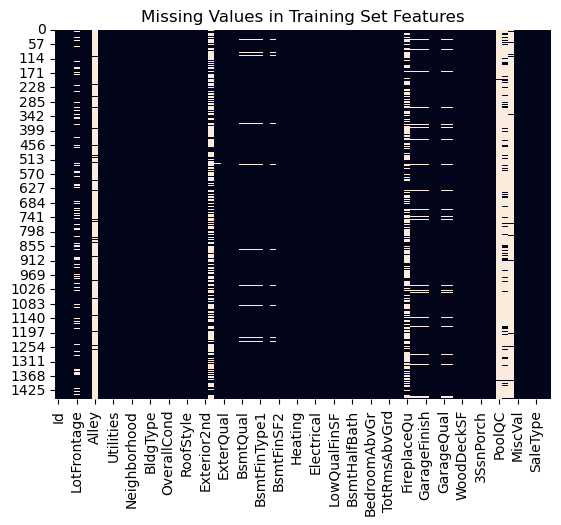

In [45]:
sns.heatmap(train.isna(),cbar = False)
plt.title('Missing Values in Training Set Features')

Text(0.5, 1.0, 'Missing Values in Test Set Features')

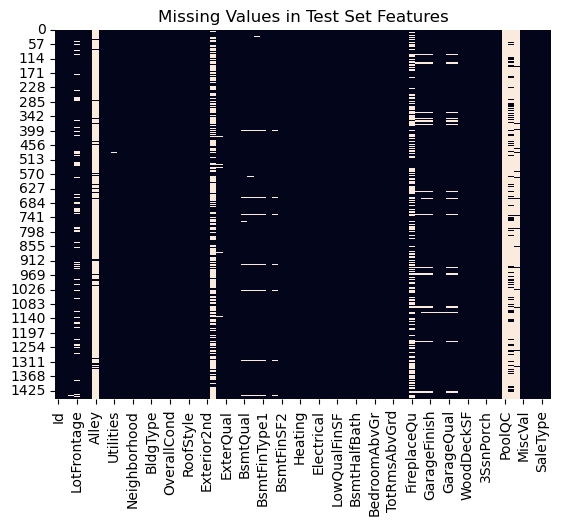

In [46]:
sns.heatmap(test.isna(),cbar = False)
plt.title('Missing Values in Test Set Features')

So as we can see, Alley, Exterior2nd, PoolQC, FireplaceQU, all contain too many missing values for the model to learn anything from. So we will drop these features

As for LotFrontage, BsmtQual, BsmntFinType1, BsmFinSF2, GarageFinish, and GarageQual we will fill these na values

In [47]:
train.drop(['Alley','Exterior2nd','FireplaceQu','PoolQC'], axis = 1,inplace=True)
test.drop(['Alley','Exterior2nd','FireplaceQu','PoolQC'], axis = 1,inplace=True)

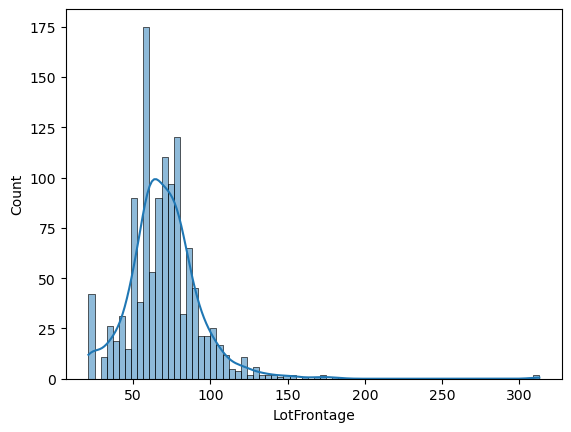

2.163569142324884


In [48]:
sns.histplot(train.LotFrontage,kde=True)
plt.show()

print(train.LotFrontage.skew())


So as we can see, the skewness = 2.16, meaning the LotFrontage is hihgly skewed to the right. Suggesting that the mean us being pulled by outliers

Meaning we will fill the LotFrontage's NA values with the median. Since we avoid distoration by outliers

In [50]:
train.LotFrontage = train.LotFrontage.fillna(train.LotFrontage.median())
test.LotFrontage = test.LotFrontage.fillna(train.LotFrontage.median())

In [51]:
train.LotFrontage.isna().any()

False

In [62]:
train.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [63]:
train.GarageFinish = train.GarageFinish.fillna(train.GarageFinish.mode()[0])
test.GarageFinish = test.GarageFinish.fillna(test.GarageFinish.mode()[0])

train.GarageFinish.isna().any()

False

In [64]:
train.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [65]:
train.GarageQual = train.GarageQual.fillna(train.GarageQual.mode()[0])
test.GarageQual = test.GarageQual.fillna(test.GarageQual.mode()[0])

train.GarageQual.isna().any()


False

In [66]:
train = train.dropna()
test = test.dropna()

Text(0.5, 1.0, 'Missing Values in Training Set Features')

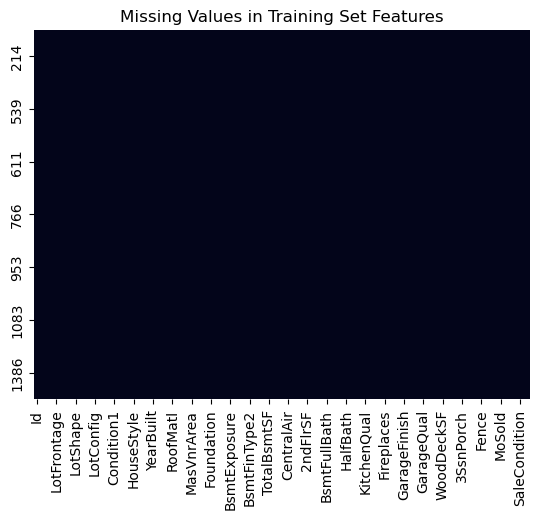

In [69]:
sns.heatmap(train.isna(),cbar = False)
plt.title('Missing Values in Training Set Features')

Text(0.5, 1.0, 'Missing Values in Test Set Features')

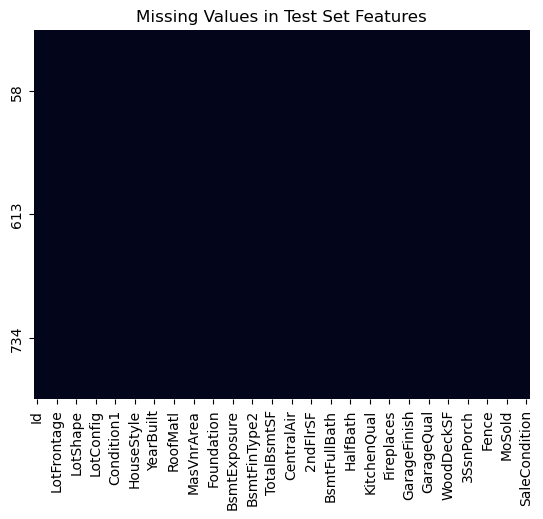

In [68]:
sns.heatmap(test.isna(),cbar = False)
plt.title('Missing Values in Test Set Features')

In [70]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .ipynb_checkpoints/Housing_prices_final-checkpoint.ipynb
	modified:   Housing_prices_final.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [74]:
!git add .

In [75]:
!git commit -m "Add datasets to DataFrames and clean missing values"

[main 717dc32] Add datasets to DataFrames and clean missing values
 2 files changed, 2120 insertions(+), 25 deletions(-)


In [76]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [77]:
!git push

Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 8 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 219.09 KiB | 16.85 MiB/s, done.
Total 5 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/RahfayS/Housing_prices_kaggle_competiton.git
   91ef889..717dc32  main -> main
